<div style='background: linear-gradient(135deg, #0d1117 0%, #161b22 100%); padding: 40px; border-radius: 10px; border-left: 5px solid #58a6ff;'>
  <h1 style='color: #58a6ff; margin: 0; font-size: 2.5em;'>⛅ JavaScript API Mastery</h1>
  <h2 style='color: #3fb950; margin: 10px 0;'>Building a Weather Application</h2>
  <p style='color: #8b949e; font-size: 1.1em; margin-top: 20px;'>Master API integration, async programming, and real-world JavaScript</p>
</div>

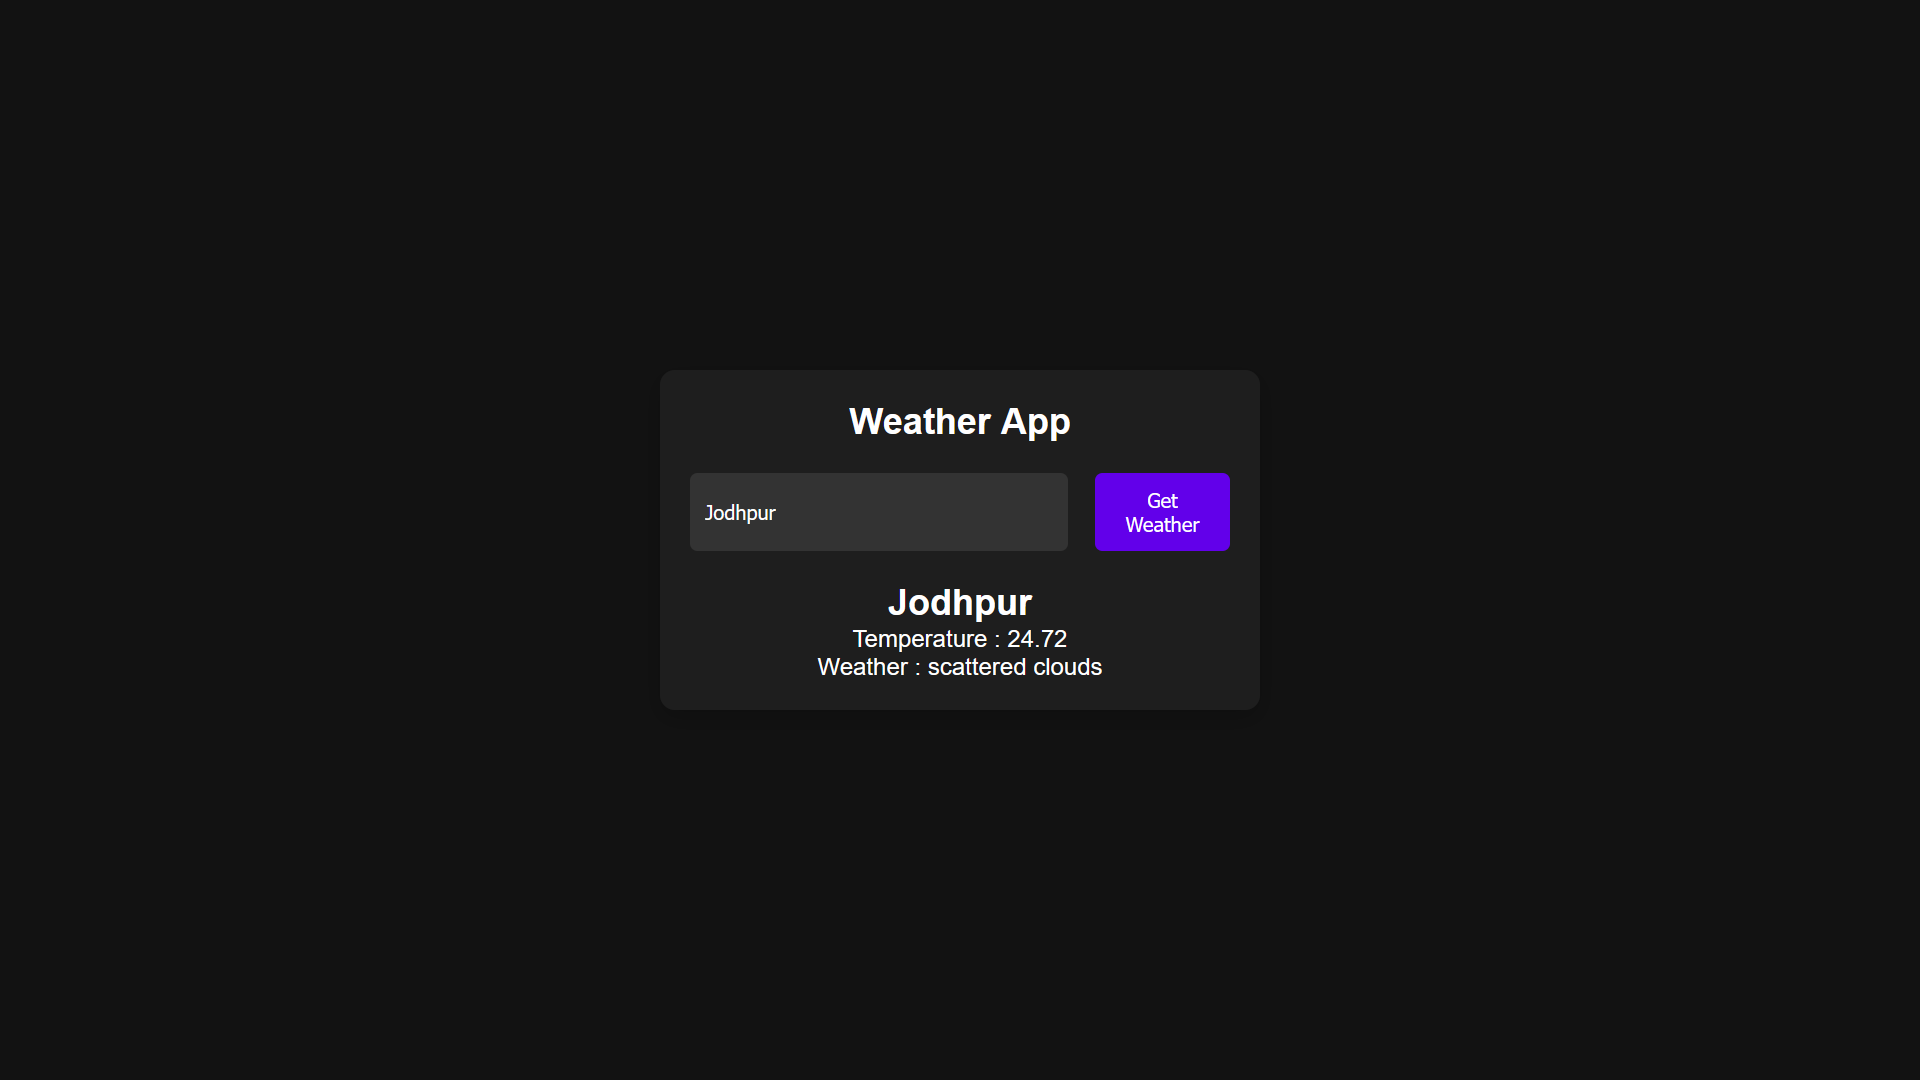

## 🎯 What You'll Learn

| Topic | Skills |
|-------|--------|
| **API Integration** | Fetch API, HTTP requests, response handling |
| **Async Programming** | async/await, Promises, error handling |
| **DOM Manipulation** | Event listeners, dynamic content updates |
| **JSON Handling** | Parsing, data extraction, destructuring |
| **Error Management** | try-catch, response validation, user feedback |
| **Security Basics** | API keys, environment variables |

---

# 1. Project Overview 🚀

We're building a **Weather Application** that:
- Takes a city name as input
- Fetches real-time weather data from OpenWeatherMap API
- Displays temperature, conditions, and description
- Handles errors gracefully

### Application Workflow

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
┌─────────────────┐
│  User Input     │
│  (City Name)    │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│  Click Button   │
│  Get Weather    │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│  Validate Input │
│  (trim, check)  │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│   Fetch API     │
│   Call (async)  │
└────────┬────────┘
         │
    ┌────┴────┐
    ▼         ▼
┌────────┐  ┌──────────┐
│Success │  │  Error   │
│Display │  │  Show    │
│Weather │  │  Message │
└────────┘  └──────────┘
</pre>

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #3fb950; margin: 20px 0;'>
  <h3 style='color: #3fb950; margin-top: 0;'>✨ Project Features</h3>
  <ul style='color: #c9d1d9;'>
    <li>Real-time weather data fetching</li>
    <li>Dynamic city search</li>
    <li>Error handling for invalid cities</li>
    <li>Clean, responsive UI updates</li>
    <li>Temperature in Celsius (configurable to Fahrenheit)</li>
  </ul>
</div>

# 2. The Two Golden Mantras 🎓

<div style='background: #161b22; padding: 25px; border-radius: 8px; border: 2px solid #f85149; margin: 20px 0;'>
  <h3 style='color: #f85149; margin-top: 0;'>⚠️ EVERY Web Developer Must Remember These</h3>
  
  <div style='background: #0d1117; padding: 15px; border-radius: 6px; margin: 15px 0; border-left: 4px solid #f85149;'>
    <h4 style='color: #f85149; margin-top: 0;'>Mantra #1: Server May Throw An Error</h4>
    <p style='color: #c9d1d9;'>It is NOT guaranteed that your request will succeed.</p>
    <p style='color: #8b949e;'><strong>Solution:</strong> Always use try-catch blocks or error handlers!</p>
  </div>
  
  <div style='background: #0d1117; padding: 15px; border-radius: 6px; margin: 15px 0; border-left: 4px solid #f0883e;'>
    <h4 style='color: #f0883e; margin-top: 0;'>Mantra #2: Server is Always in Another Continent</h4>
    <p style='color: #c9d1d9;'>Responses ALWAYS take time (even if just milliseconds).</p>
    <p style='color: #8b949e;'><strong>Solution:</strong> Use async/await or Promises for asynchronous operations!</p>
  </div>
</div>

> 💡 **Tip:** These two mantras will save you from countless bugs throughout your entire web development career. Write them down!

### Why These Matter

| Mantra | Prevents | Solution |
|--------|----------|----------|
| **#1: Server may throw error** | App crashes, undefined errors | `try-catch`, error validation |
| **#2: Server in another continent** | Frozen UI, blocking operations | `async/await`, Promises |

Together, they create **robust, professional applications** that handle real-world scenarios.

# 3. HTML Structure 📄

Our weather app has a simple, clean structure:

```html
<!-- Input Field for City Name -->
<input type="text" id="city-input" placeholder="Enter city name">

<!-- Button to Trigger Weather Fetch -->
<button id="get-weather-btn">Get Weather</button>

<!-- Display Area for Weather Information -->
<div id="weather-info" class="hidden">
  <h2 id="city-name-display"></h2>
  <p id="temperature-display"></p>
  <p id="description-display"></p>
</div>

<!-- Error Message Display -->
<p id="error-message" class="hidden">City not found!</p>
```

### HTML Component Tree

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
Container
  |
  |--- H1 Title (Weather Application)
  |
  |--- Input Container
  |      |
  |      |--- input#city-input
  |      |--- button#get-weather-btn
  |
  |--- div#weather-info (class: hidden)
  |      |
  |      |--- h2#city-name-display
  |      |--- p#temperature-display
  |      |--- p#description-display
  |
  |--- p#error-message (class: hidden)
</pre>

### The Hidden Class

```css
.hidden {
  display: none;
}
```

**Purpose:** Toggle visibility of elements

| State | Weather Info | Error Message |
|-------|--------------|---------------|
| Initial | `hidden` | `hidden` |
| Success | visible | `hidden` |
| Error | `hidden` | visible |

> 💡 **Tip:** Instead of using forms (which add complexity with submit events), we use simple input + button for focused learning.

# 4. DOM Manipulation Setup ⚙️

### The DOMContentLoaded Event

JavaScript executes FAST - sometimes too fast! If your script runs before HTML elements are created, you'll get `null` errors.

```javascript
document.addEventListener('DOMContentLoaded', () => {
  // All your code goes here
  // DOM is fully loaded and ready!
  
  console.log('DOM is ready! Let\'s rock!');
});
```

**Output:**
```
DOM is ready! Let's rock!
```

### Grabbing DOM Elements

```javascript
// Store references to DOM elements
const cityInput = document.getElementById('city-input');
const getWeatherBtn = document.getElementById('get-weather-btn');
const weatherInfo = document.getElementById('weather-info');
const cityNameDisplay = document.getElementById('city-name-display');
const temperatureDisplay = document.getElementById('temperature-display');
const descriptionDisplay = document.getElementById('description-display');
const errorMessage = document.getElementById('error-message');
```

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #58a6ff; margin: 20px 0;'>
  <h4 style='color: #58a6ff; margin-top: 0;'>🎯 Pro Tips for DOM Selection</h4>
  <ul style='color: #c9d1d9;'>
    <li>Store references in variables - don't query the DOM repeatedly</li>
    <li>Use descriptive variable names (e.g., <code>cityNameDisplay</code> not just <code>city</code>)</li>
    <li>Avoid hyphens in JavaScript variable names (use camelCase)</li>
    <li>Group related selections together for better code organization</li>
  </ul>
</div>

# 5. Event Listeners 🖱️

Event listeners are like **security guards** waiting for specific actions. When the action happens (like a button click), they execute your code!

### Click Event Flow

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
User                Button              Event Listener        Function
 |                    |                       |                   |
 |---- clicks ------->|                       |                   |
 |                    |---- triggers -------->|                   |
 |                    |                       |---- executes ---->|
 |                    |                       |                   |
 |<----------------------- Response/Update --------------------|
</pre>

### Implementation

```javascript
getWeatherBtn.addEventListener('click', async () => {
  // Step 1: Get the city name from input
  const city = cityInput.value.trim();
  
  // Step 2: Validate input (empty strings are falsy!)
  if (!city) {
    return; // Exit early if no city entered
  }
  
  // Step 3: Make API request
  try {
    const weatherData = await fetchWeatherData(city);
    displayWeatherData(weatherData);
  } catch (error) {
    showError();
  }
});
```

**Example behavior:**
```
Input: "  London  " → city.trim() → "London" ✓
Input: "   "        → city.trim() → ""       → return (exit)
```

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #f0883e; margin: 20px 0;'>
  <h4 style='color: #f0883e; margin-top: 0;'>⚡ The .trim() Method</h4>
  <p style='color: #c9d1d9;'>Always use <code>.trim()</code> on user input! It removes extra spaces from the beginning and end.</p>
  <table style='width: 100%; color: #c9d1d9; margin-top: 10px;'>
    <tr>
      <td><code>"  London  ".trim()</code></td>
      <td>→</td>
      <td><code>"London"</code></td>
    </tr>
    <tr>
      <td><code>"   ".trim()</code></td>
      <td>→</td>
      <td><code>""</code> (empty = falsy!)</td>
    </tr>
  </table>
</div>

# 6. API Keys & Security 🔐

### Getting Your API Key

| Step | Action |
|------|--------|
| 1 | Visit **openweathermap.org** |
| 2 | Create a free account |
| 3 | Go to API Keys section |
| 4 | Copy your unique API key |

### Storing the API Key

```javascript
// Store API key in a constant variable
const API_KEY = 'your_actual_api_key_here';

// This key will be used in our fetch requests
// DO NOT share this key publicly!
// DO NOT commit this to public GitHub repos!
```

<div style='background: #161b22; padding: 20px; border-radius: 8px; border: 2px solid #f85149; margin: 20px 0;'>
  <h3 style='color: #f85149; margin-top: 0;'>⚠️ API Keys Are Like Passwords!</h3>
  <p style='color: #c9d1d9;'>Treat them with respect. Never share them publicly.</p>
  
  <h4 style='color: #f85149;'>Exposed API Keys Can:</h4>
  <ul style='color: #c9d1d9;'>
    <li>Cost you money if someone abuses your quota</li>
    <li>Get your account banned for violation</li>
    <li>Be used for malicious purposes</li>
    <li>Compromise your application's integrity</li>
  </ul>
  
  <h4 style='color: #3fb950; margin-top: 15px;'>Better Security Practices (For Later):</h4>
  <ul style='color: #8b949e;'>
    <li>Use <code>.env</code> files for environment variables</li>
    <li>Keep API keys on the server-side (backend)</li>
    <li>Use environment variable loaders like <code>dotenv</code></li>
    <li>Never commit <code>.env</code> files to version control</li>
    <li>Rotate keys regularly if exposed</li>
  </ul>
</div>

# 7. The Fetch API ☁️

The **Fetch API** is a modern, powerful way to make HTTP requests in JavaScript. It replaced the old `XMLHttpRequest` and provides a cleaner, promise-based interface.

### Fetch Flow

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
fetch(url)
    |
    v
Response Object (Promise)
    |
    v
response.ok check
    |
    +----> true  ----> response.json()
    |                       |
    |                       v
    |                  Usable Data (JavaScript Object)
    |
    +----> false ----> throw Error
</pre>

### Building the API URL

```javascript
// Function to fetch weather data
async function fetchWeatherData(city) {
  // Build the API URL with template literals
  const url = `https://api.openweathermap.org/data/2.5/weather?q=${city}&appid=${API_KEY}&units=metric`;
  
  // URL Breakdown:
  // Base: https://api.openweathermap.org/data/2.5/weather
  // Query Parameters:
  //   ?q=${city}           - City name
  //   &appid=${API_KEY}    - Your API key
  //   &units=metric        - Celsius temperature
}
```

**Example URL:**
```
https://api.openweathermap.org/data/2.5/weather?q=London&appid=abc123&units=metric
```

### Understanding URL Components

| Component | Example | Purpose |
|-----------|---------|----------|
| **Base URL** | `https://api.openweathermap.org/data/2.5/weather` | Main endpoint |
| **Query Start** | `?` | Begins query parameters |
| **Parameter** | `q=London` | City name to search |
| **Separator** | `&` | Separates parameters |
| **API Key** | `appid=abc123` | Authentication |
| **Units** | `units=metric` | Celsius (vs imperial for Fahrenheit) |

> 💡 **Tip:** Template literals (\`${variable}\`) make it easy to insert dynamic values into URLs.

### Complete Fetch Implementation

```javascript
async function fetchWeatherData(city) {
  try {
    // Step 1: Build the URL
    const url = `https://api.openweathermap.org/data/2.5/weather?q=${city}&appid=${API_KEY}&units=metric`;
    
    // Step 2: Make the fetch request (await because another continent!)
    const response = await fetch(url);
    
    // Step 3: Check if response is OK
    if (!response.ok) {
      throw new Error('City not found');
    }
    
    // Step 4: Convert response to JSON
    const data = await response.json();
    
    // Step 5: Return the data
    return data;
    
  } catch (error) {
    // If anything goes wrong, throw the error up
    throw error;
  }
}
```

### Response Object Properties

| Property | Type | Description | Example |
|----------|------|-------------|----------|
| `response.ok` | boolean | True if status 200-299 | `true` |
| `response.status` | number | HTTP status code | `200`, `404` |
| `response.statusText` | string | Status message | `"OK"`, `"Not Found"` |
| `response.json()` | method | Converts to JavaScript object | Returns Promise |

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #58a6ff; margin: 20px 0;'>
  <h4 style='color: #58a6ff; margin-top: 0;'>🔍 The response.ok Property</h4>
  <ul style='color: #c9d1d9;'>
    <li>Returns <code>true</code> if status code is 200-299 (success)</li>
    <li>Returns <code>false</code> for 400-599 (errors)</li>
    <li>Always check this before processing data!</li>
    <li>Prevents errors from corrupting your app</li>
  </ul>
</div>

# 8. Async/Await Deep Dive ⏳

Remember **Mantra #2**: *Server is always in another continent*. Async/await lets us write asynchronous code that looks synchronous - much easier to read and understand!

### The Problem Without Async

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
WITHOUT ASYNC (Bad):
t=0ms -------- t=500ms -------- t=1000ms
  |               |                 |
Request -----> WAITING --------> Response
  |               |                 |
  UI FROZEN   UI FROZEN        UI ACTIVE
  
User can't interact while waiting!
</pre>

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
WITH ASYNC (Good):
t=0ms -------- t=500ms -------- t=1000ms
  |               |                 |
Request -----> UI ACTIVE ------> Response
  |               |                 |
  UI ACTIVE   UI ACTIVE        Update Display
  
User can still use the app while waiting!
</pre>

### Async/Await Syntax

```javascript
// Mark function as async
async function fetchWeatherData(city) {
  // Use await for promises
  const response = await fetch(url);  // Waits here
  const data = await response.json(); // Waits here too
  
  return data; // Returns a promise automatically!
}

// Calling an async function
async function handleClick() {
  try {
    // Must await async functions
    const weatherData = await fetchWeatherData('London');
    console.log(weatherData);
  } catch (error) {
    console.log('Error:', error);
  }
}
```

### Async/Await Rules

| Rule | Explanation | Example |
|------|-------------|----------|
| **#1** | Only use `await` inside `async` functions | ✓ `async function f() { await ... }` |
| **#2** | `await` pauses execution until Promise resolves | Waits for server response |
| **#3** | Async functions always return Promises | Even `return data` becomes Promise |
| **#4** | Use try-catch for error handling | Wrap await calls in try-catch |
| **#5** | Multiple awaits run sequentially | One after another, not parallel |

> 💡 **Memory Trick:** Think of `await` as a "pause button" for your code. It waits for the Promise to finish before moving to the next line.

# 9. Error Handling ⚠️

Remember **Mantra #1**: Server may throw an error! Always wrap API calls in try-catch blocks. ALWAYS. No exceptions!

### Try-Catch Flow

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
                    try {
                  execute code
                        }
                        |
           +------------+------------+
           |                         |
       No Error                   Error!
           |                         |
           v                         v
    Continue execution       catch (error) {
    Display data              handle error
                              show message
                                    }
</pre>

### Implementation

```javascript
getWeatherBtn.addEventListener('click', async () => {
  const city = cityInput.value.trim();
  
  if (!city) {
    return;
  }
  
  try {
    // TRY to fetch weather data
    const weatherData = await fetchWeatherData(city);
    
    // If successful, display it
    displayWeatherData(weatherData);
    
  } catch (error) {
    // CATCH any errors that occur
    console.log('Error occurred:', error);
    
    // Show error message to user
    showError();
  }
});
```

### The showError Function

```javascript
function showError() {
  // Hide weather info (if it was showing)
  weatherInfo.classList.add('hidden');
  
  // Show error message
  errorMessage.classList.remove('hidden');
}
```

**Visual Output:**
```
City not found!
```

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #3fb950; margin: 20px 0;'>
  <h4 style='color: #3fb950; margin-top: 0;'>✅ User-Friendly Error Handling</h4>
  <ul style='color: #c9d1d9;'>
    <li>Always show meaningful error messages</li>
    <li>Don't expose technical details to users</li>
    <li>Hide old data when showing errors</li>
    <li>Log detailed errors to console for debugging</li>
    <li>Consider different error types (network, validation, etc.)</li>
  </ul>
</div>

### Error Handling Summary

| What | Where | Why |
|------|-------|-----|
| `try-catch` | Around async operations | Prevent crashes |
| `response.ok` check | After fetch | Validate HTTP response |
| `throw new Error()` | When validation fails | Trigger catch block |
| `showError()` | In catch block | User feedback |
| `console.log(error)` | In catch block | Developer debugging |

# 10. JSON Response Handling 📊

**JSON** (JavaScript Object Notation) is a lightweight data format. It looks like JavaScript objects but is actually text. We need to parse it to use it as real JavaScript data.

### Sample API Response from OpenWeatherMap

```json
{
  "coord": {
    "lon": 75.7873,
    "lat": 26.9124
  },
  "weather": [
    {
      "id": 721,
      "main": "Haze",
      "description": "haze",
      "icon": "50d"
    }
  ],
  "main": {
    "temp": 25.5,
    "feels_like": 26.2,
    "temp_min": 25.5,
    "temp_max": 25.5,
    "pressure": 1013,
    "humidity": 65
  },
  "name": "Jaipur"
}
```

### Response Structure Breakdown

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
Response Object
  |
  |--- name (string) ---------> "Jaipur"
  |
  |--- main (object)
  |      |
  |      |--- temp ---------> 25.5
  |      |--- humidity -----> 65
  |      |--- pressure -----> 1013
  |
  |--- weather (array)
  |      |
  |      |--- [0] (object)
  |             |
  |             |--- main ---------> "Haze"
  |             |--- description --> "haze"
  |             |--- icon ---------> "50d"
  |
  |--- coord (object)
         |
         |--- lon --> 75.7873
         |--- lat --> 26.9124
</pre>

### Data Type Identification

| Property | Type | Access Method | Example |
|----------|------|---------------|----------|
| `name` | String | Direct access | `data.name` |
| `main` | Object | Dot notation | `data.main.temp` |
| `weather` | Array | Index + dot | `data.weather[0].description` |
| `coord` | Object | Dot notation | `data.coord.lon` |

> 💡 **Key Insight:** You MUST know the data structure to extract values correctly. Arrays need `[0]` first, objects use `.property`.

### Extracting Data with Destructuring

```javascript
function displayWeatherData(data) {
  // Destructure top-level properties
  const { name, main, weather } = data;
  
  // name is a string - use directly
  cityNameDisplay.textContent = name;
  
  // main is an object - access its properties
  temperatureDisplay.textContent = `Temperature: ${main.temp}°C`;
  
  // weather is an array - get first element's description
  descriptionDisplay.textContent = weather[0].description;
  
  // Unlock the display (remove hidden class)
  weatherInfo.classList.remove('hidden');
  
  // Hide any previous error messages
  errorMessage.classList.add('hidden');
}
```

**Output on page:**
```
Jaipur
Temperature: 25.5°C
haze
```

### How to Study API Responses

```javascript
async function fetchWeatherData(city) {
  const response = await fetch(url);
  const data = await response.json();
  
  // STUDY THE RESPONSE!
  console.log('Response:', data);
  console.log('Type:', typeof data);
  console.log('Name:', data.name);
  console.log('Temperature:', data.main.temp);
  console.log('Weather:', data.weather[0].description);
  
  return data;
}
```

**Console Output:**
```
Response: {coord: {…}, weather: Array(1), main: {…}, name: "Jaipur", …}
Type: object
Name: Jaipur
Temperature: 25.5
Weather: haze
```

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #f0883e; margin: 20px 0;'>
  <h4 style='color: #f0883e; margin-top: 0;'>⚡ Data Type Matters!</h4>
  <table style='width: 100%; color: #c9d1d9; border-collapse: collapse;'>
    <tr style='border-bottom: 1px solid #30363d;'>
      <th style='text-align: left; padding: 8px;'>Type</th>
      <th style='text-align: left; padding: 8px;'>How to Access</th>
      <th style='text-align: left; padding: 8px;'>Example</th>
    </tr>
    <tr>
      <td style='padding: 8px;'>String</td>
      <td style='padding: 8px;'>Use directly</td>
      <td style='padding: 8px;'><code>data.name</code></td>
    </tr>
    <tr>
      <td style='padding: 8px;'>Object</td>
      <td style='padding: 8px;'>Dot notation</td>
      <td style='padding: 8px;'><code>data.main.temp</code></td>
    </tr>
    <tr>
      <td style='padding: 8px;'>Array</td>
      <td style='padding: 8px;'>Index first</td>
      <td style='padding: 8px;'><code>data.weather[0].description</code></td>
    </tr>
  </table>
  <p style='color: #8b949e; margin-top: 10px;'>Always use <code>console.log()</code> to verify structure!</p>
</div>

# 11. Developer Tools & Resources 🛠️

### JSON Formatter Tools

Raw JSON responses are hard to read - they're just one long string! JSON formatters make them beautiful and easy to understand.

**Popular Tools:**

| Tool | Type | Features |
|------|------|----------|
| **JSONFormatter Extension** | Browser | Auto-formats JSON in tabs |
| **jsonformatter.org** | Website | Tree view, validation |
| **Browser DevTools** | Built-in | F12 → Network → Response |
| **VSCode Extensions** | Editor | Prettier, JSON Tools |

### Before vs After Formatting

```javascript
// Before (one line, hard to read)
{"name":"London","main":{"temp":15.2,"humidity":72},"weather":[{"description":"cloudy"}]}

// After (formatted, easy to read)
{
  "name": "London",
  "main": {
    "temp": 15.2,
    "humidity": 72
  },
  "weather": [
    {
      "description": "cloudy"
    }
  ]
}
```

### Using Browser Console for Debugging

```javascript
// Log the entire response
console.log('Full Response:', data);

// Log specific properties
console.log('City:', data.name);
console.log('Temperature:', data.main.temp);

// Use console.table for arrays
console.table(data.weather);

// Use console.dir to see object structure
console.dir(data);
```

> 💡 **Pro Tip:** Every developer spends 1-2 days understanding API responses when working with third-party services. It's completely normal!

# 12. Complete Code Walkthrough 🎯

### Function Atomicity Principle

Each function should do **ONE thing and ONE thing only**. This makes code:
- Easier to read
- Easier to debug
- Easier to test
- More reusable

### Our Three Main Functions

| Function | Single Responsibility | Returns |
|----------|----------------------|----------|
| `fetchWeatherData(city)` | Fetch data from API | Weather data object |
| `displayWeatherData(data)` | Display data on page | Nothing (void) |
| `showError()` | Show error message | Nothing (void) |

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background: #161b22; padding: 20px; border-radius: 8px; border: 1px solid #30363d;">
Function Flow:

fetchWeatherData(city)
        |
        |---> Success ----> displayWeatherData(data)
        |
        |---> Error ------> showError()
</pre>

### Complete JavaScript Implementation

```javascript
// Wait for DOM to be fully loaded
document.addEventListener('DOMContentLoaded', () => {
  
  // ======================
  // DOM ELEMENT REFERENCES
  // ======================
  const cityInput = document.getElementById('city-input');
  const getWeatherBtn = document.getElementById('get-weather-btn');
  const weatherInfo = document.getElementById('weather-info');
  const cityNameDisplay = document.getElementById('city-name-display');
  const temperatureDisplay = document.getElementById('temperature-display');
  const descriptionDisplay = document.getElementById('description-display');
  const errorMessage = document.getElementById('error-message');
  
  // ======================
  // API KEY (Use your own!)
  // ======================
  const API_KEY = 'your_api_key_here';
  
  // ======================
  // EVENT LISTENER
  // ======================
  getWeatherBtn.addEventListener('click', async () => {
    const city = cityInput.value.trim();
    
    // Validate input
    if (!city) {
      return;
    }
    
    try {
      const weatherData = await fetchWeatherData(city);
      displayWeatherData(weatherData);
    } catch (error) {
      showError();
    }
  });
  
  // ======================
  // FETCH WEATHER DATA
  // ======================
  async function fetchWeatherData(city) {
    try {
      const url = `https://api.openweathermap.org/data/2.5/weather?q=${city}&appid=${API_KEY}&units=metric`;
      
      const response = await fetch(url);
      
      if (!response.ok) {
        throw new Error('City not found');
      }
      
      const data = await response.json();
      return data;
      
    } catch (error) {
      throw error;
    }
  }
  
  // ======================
  // DISPLAY WEATHER DATA
  // ======================
  function displayWeatherData(data) {
    const { name, main, weather } = data;
    
    cityNameDisplay.textContent = name;
    temperatureDisplay.textContent = `Temperature: ${main.temp}°C`;
    descriptionDisplay.textContent = weather[0].description;
    
    weatherInfo.classList.remove('hidden');
    errorMessage.classList.add('hidden');
  }
  
  // ======================
  // SHOW ERROR
  // ======================
  function showError() {
    weatherInfo.classList.add('hidden');
    errorMessage.classList.remove('hidden');
  }
  
});
```

### Code Execution Flow Example

**User types:** `London`

```
1. User clicks "Get Weather" button
2. Event listener fires
3. city = "London" (after trim)
4. Validation passes (city is not empty)
5. fetchWeatherData("London") called
   - URL built with London and API key
   - fetch() makes HTTP request
   - Wait for response (await)
   - response.ok = true
   - response.json() converts to object
   - Return weather data
6. displayWeatherData(data) called
   - Extract name, main, weather
   - Update DOM elements
   - Show weather info
   - Hide error message
7. User sees weather displayed!
```

# 13. Practice Resources 📚

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #a371f7; margin: 20px 0;'>
  <h3 style='color: #a371f7; margin-top: 0;'>🎯 Free API Project</h3>
  <p style='color: #c9d1d9;'>An amazing open-source collection of APIs designed specifically for learning!</p>
  <p style='color: #8b949e;'><strong>URL:</strong> freeapi.app</p>
  
  <h4 style='color: #3fb950;'>Features:</h4>
  <ul style='color: #c9d1d9;'>
    <li>Free APIs for practice</li>
    <li>No API key required for public endpoints</li>
    <li>Interactive documentation</li>
    <li>Try APIs directly in browser</li>
    <li>Categories: Users, Jokes, Stocks, Meals, YouTube, etc.</li>
  </ul>
</div>

### Suggested Practice Projects

| Project | Difficulty | What You'll Learn |
|---------|------------|-------------------|
| **Random Joke Generator** | Easy | Basic fetch, display text |
| **Random User Profile** | Easy | Object data extraction |
| **Meal Finder** | Medium | Images, multiple properties |
| **Stock Tracker** | Medium | Real-time data, numbers |
| **YouTube Video Info** | Hard | Complex nested data |

### Challenge Assignment

<div style='background: #161b22; padding: 20px; border-radius: 8px; border-left: 4px solid #f0883e; margin: 20px 0;'>
  <h4 style='color: #f0883e; margin-top: 0;'>🎨 Weather App Enhancement</h4>
  <p style='color: #c9d1d9;'><strong>Task:</strong> Add weather-specific images to your app!</p>
  
  <h4 style='color: #c9d1d9;'>Steps:</h4>
  <ol style='color: #8b949e;'>
    <li>Study the <code>weather[0].main</code> property from API</li>
    <li>Possible values: Clear, Clouds, Rain, Snow, Thunderstorm, etc.</li>
    <li>Create or find 10 weather icons/images</li>
    <li>Use conditional logic to display correct image</li>
    <li><strong>Bonus:</strong> Add smooth transitions when changing images</li>
  </ol>
</div>

**Hint for Challenge:**

```javascript
const weatherType = weather[0].main;

if (weatherType === 'Clear') {
  // Show sunny image
  weatherIcon.src = 'images/sunny.png';
} else if (weatherType === 'Clouds') {
  // Show cloudy image
  weatherIcon.src = 'images/cloudy.png';
} else if (weatherType === 'Rain') {
  // Show rainy image
  weatherIcon.src = 'images/rainy.png';
}
// ... and so on
```

# 14. Common Pitfalls ⚠️

### Pitfall #1: Forgetting Async

| ❌ Wrong | ✅ Correct |
|---------|----------|
| `function getData() {`<br>`  const data = await fetch(url);`<br>`  // ERROR!`<br>`}` | `async function getData() {`<br>`  const data = await fetch(url);`<br>`  // Perfect!`<br>`}` |

**Error:** `SyntaxError: await is only valid in async function`

---

### Pitfall #2: Not Checking Response

| ❌ Wrong | ✅ Correct |
|---------|----------|
| `const response = await fetch(url);`<br>`const data = await response.json();`<br>`// What if response failed?` | `const response = await fetch(url);`<br>`if (!response.ok) {`<br>`  throw new Error('Failed!');`<br>`}`<br>`const data = await response.json();` |

**Problem:** You might parse an error object thinking it's valid data!

---

### Pitfall #3: Forgetting Try-Catch

| ❌ Wrong | ✅ Correct |
|---------|----------|
| `button.addEventListener('click', async () => {`<br>`  const data = await fetch(url);`<br>`  // App crashes if error occurs!`<br>`});` | `button.addEventListener('click', async () => {`<br>`  try {`<br>`    const data = await fetch(url);`<br>`  } catch (error) {`<br>`    showError();`<br>`  }`<br>`});` |

**Problem:** Unhandled promise rejection crashes the app!

### Pitfall #4: Wrong Data Structure Access

```javascript
// API Response:
// {
//   name: "London",
//   weather: [{ description: "cloudy" }]
// }

// ❌ WRONG - weather is an array, not object
const desc = data.weather.description; // undefined!

// ✅ CORRECT - access array first, then property
const desc = data.weather[0].description; // "cloudy"
```

### Common Error Messages & Solutions

| Error Message | Cause | Solution |
|---------------|-------|----------|
| `await is only valid in async` | Missing `async` keyword | Add `async` before function |
| `Cannot read property of undefined` | Wrong data access | Check API structure |
| `Unhandled promise rejection` | No try-catch | Wrap in try-catch |
| `Failed to fetch` | Network/CORS error | Check URL, API key |
| `City not found` | Invalid city name | Validate user input |

# 15. Quick Revision Table 📝

<div style='background: #161b22; padding: 20px; border-radius: 8px; border: 2px solid #58a6ff; margin: 20px 0;'>
  <h3 style='color: #58a6ff; margin-top: 0;'>🎯 API Cheat Sheet</h3>
</div>

| Concept | Syntax | Purpose | Example |
|---------|--------|---------|----------|
| **Fetch API** | `fetch(url)` | Make HTTP request | `fetch('https://api.example.com')` |
| **Async Function** | `async function name()` | Enable await usage | `async function getData()` |
| **Await** | `await promise` | Wait for Promise | `await fetch(url)` |
| **Response Check** | `response.ok` | Validate HTTP response | `if (!response.ok) throw Error` |
| **JSON Parse** | `response.json()` | Convert to JS object | `const data = await response.json()` |
| **Try-Catch** | `try {...} catch(e) {...}` | Error handling | Wrap async operations |
| **Template Literal** | \`text ${var}\` | Dynamic strings | \`https://api.com?q=${city}\` |
| **Destructuring** | `const {x, y} = obj` | Extract properties | `const {name, main} = data` |
| **classList.add** | `element.classList.add()` | Add CSS class | `div.classList.add('hidden')` |
| **classList.remove** | `element.classList.remove()` | Remove CSS class | `div.classList.remove('hidden')` |

### The Two Mantras (Memorize These!)

<div style='background: #0d1117; padding: 20px; border-radius: 8px; border: 2px solid #f85149; margin: 20px 0;'>
  <h3 style='color: #f85149; margin-top: 0;'>🔥 Golden Rules</h3>
  <table style='width: 100%; color: #c9d1d9; border-collapse: collapse;'>
    <tr style='border-bottom: 2px solid #30363d;'>
      <th style='text-align: left; padding: 12px; color: #f85149;'>Mantra</th>
      <th style='text-align: left; padding: 12px; color: #f85149;'>Meaning</th>
      <th style='text-align: left; padding: 12px; color: #f85149;'>Solution</th>
    </tr>
    <tr style='border-bottom: 1px solid #30363d;'>
      <td style='padding: 12px; color: #f85149;'><strong>#1</strong></td>
      <td style='padding: 12px;'>Server may throw an error</td>
      <td style='padding: 12px;'>Always use try-catch</td>
    </tr>
    <tr>
      <td style='padding: 12px; color: #f0883e;'><strong>#2</strong></td>
      <td style='padding: 12px;'>Server is in another continent</td>
      <td style='padding: 12px;'>Always use async/await</td>
    </tr>
  </table>
</div>

### Complete Workflow Checklist

| Step | Action | Code Pattern |
|------|--------|---------------|
| 1 | Wait for DOM | `document.addEventListener('DOMContentLoaded', ...)` |
| 2 | Get DOM elements | `const element = document.getElementById('id')` |
| 3 | Add event listener | `button.addEventListener('click', async () => {})` |
| 4 | Validate input | `if (!input.value.trim()) return;` |
| 5 | Build URL | \`${baseURL}?q=${city}&key=${API_KEY}\` |
| 6 | Fetch data | `const response = await fetch(url)` |
| 7 | Check response | `if (!response.ok) throw Error` |
| 8 | Parse JSON | `const data = await response.json()` |
| 9 | Extract data | `const {name, main, weather} = data` |
| 10 | Update DOM | `element.textContent = value` |
| 11 | Toggle visibility | `element.classList.remove('hidden')` |
| 12 | Handle errors | `catch(error) { showError() }` |

# 16. Memory Tricks 🧠

### Acronyms to Remember

**F.E.T.C.H.**
- **F**etch the URL
- **E**valuate response.ok
- **T**ransform to JSON
- **C**atch errors always
- **H**andle the data

**A.W.A.I.T.**
- **A**sync function required
- **W**ait for promises
- **A**lways try-catch
- **I**n async functions only
- **T**akes time (another continent!)

---

### Visual Memory Tricks

> 🔑 **API Key = Password** → Never share it

> 🌍 **Server = Another Continent** → Always takes time (async)

> 💥 **Server = Unreliable Friend** → Might not respond (error handling)

> 📦 **Response = Gift Box** → Check if it's okay before opening (.ok check)

> 🎯 **Function = Single Task Robot** → Each does ONE thing only

### Code Pattern Templates

**Template 1: Basic Fetch**
```javascript
async function fetchData() {
  try {
    const response = await fetch(url);
    if (!response.ok) throw new Error();
    const data = await response.json();
    return data;
  } catch (error) {
    throw error;
  }
}
```

**Template 2: Event Handler**
```javascript
element.addEventListener('click', async () => {
  try {
    const data = await fetchData();
    displayData(data);
  } catch (error) {
    showError();
  }
});
```

> 💡 **Pro Tip:** Save these templates and reuse them for every API project!

# 17. One-Liners to Remember 💎

<div style='background: #161b22; padding: 25px; border-radius: 8px; border-left: 4px solid #a371f7; margin: 20px 0;'>

**On API Calls:**
> *"Every API call is a promise to wait and a potential to fail."*

**On Async/Await:**
> *"Async makes the function patient, await makes the code polite."*

**On Error Handling:**
> *"Try optimistically, catch pessimistically."*

**On Data Structures:**
> *"Strings are simple, objects need dots, arrays need brackets first."*

**On Function Design:**
> *"One function, one job, zero confusion."*

**On Validation:**
> *"Trust user input like you trust a stranger with your password - don't."*

**On Debugging:**
> *"When in doubt, console.log it out."*

**On API Keys:**
> *"API keys are passwords in disguise - guard them with your life."*

**On response.ok:**
> *"Check if the response is okay before you celebrate - always verify before you trust."*

**On Learning:**
> *"Every API you master is a superpower you unlock."*

</div>

# 18. Debugging Checklist 🐛

### When Something Goes Wrong

| ✓ | Check This | How to Fix |
|---|------------|------------|
| ☐ | DOM fully loaded? | Use `DOMContentLoaded` event |
| ☐ | Function marked `async`? | Add `async` keyword |
| ☐ | Using `await` with fetch? | Add `await` before fetch and .json() |
| ☐ | Checking `response.ok`? | Add `if (!response.ok) throw Error` |
| ☐ | Try-catch wrapping async code? | Wrap in try-catch block |
| ☐ | Array access using [0]? | Use `data.array[0].property` |
| ☐ | Console.log the response? | Add `console.log(data)` to inspect |
| ☐ | API key correct and active? | Check OpenWeatherMap dashboard |
| ☐ | Hidden class toggled correctly? | Verify classList.add/remove |
| ☐ | User input trimmed? | Use `.trim()` on input values |

### Console Commands for Debugging

```javascript
// Check what data looks like
console.log('Data:', data);

// Check data type
console.log('Type:', typeof data);

// Inspect object structure
console.dir(data);

// Display arrays nicely
console.table(data.weather);

// Check specific properties
console.log('City:', data.name);
console.log('Temp:', data.main.temp);
console.log('Weather:', data.weather[0]);
```

<div style='background: linear-gradient(135deg, #0d1117 0%, #161b22 100%); padding: 40px; border-radius: 10px; border: 2px solid #3fb950; margin: 30px 0; text-align: center;'>
  <h2 style='color: #3fb950; margin: 0; font-size: 2em;'>🎉 Congratulations!</h2>
  <p style='color: #c9d1d9; font-size: 1.2em; margin: 20px 0;'>You've mastered JavaScript API integration!</p>
  
  <div style='background: #0d1117; padding: 20px; border-radius: 8px; margin: 20px 0;'>
    <h3 style='color: #58a6ff;'>Skills Unlocked:</h3>
    <p style='color: #8b949e;'>✓ Fetch API | ✓ Async/Await | ✓ Error Handling<br>
    ✓ JSON Parsing | ✓ DOM Manipulation | ✓ Event Listeners<br>
    ✓ API Security | ✓ Data Destructuring | ✓ Response Validation</p>
  </div>
  
  <p style='color: #a371f7; font-size: 1.1em; margin-top: 20px;'>Keep practicing! Every API you master is a superpower you unlock! 🚀</p>
  
  <p style='color: #8b949e; margin-top: 30px; font-style: italic;'>"May your APIs always return 200 OK!"</p>
</div>

---

### Next Steps

1. **Practice** with different APIs (GitHub, Random User, etc.)
2. **Experiment** with POST requests (sending data to servers)
3. **Learn** about authentication (OAuth, JWT)
4. **Build** multiple projects to solidify concepts
5. **Join** developer communities for feedback
6. **Share** your projects and help others learn

> 💡 **Remember:** Every expert was once a beginner. You're on the right path! Keep coding! 🎯